
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [27]:
print(tf.__version__)

<IPython.core.display.Javascript object>

2.8.0


## The Data

**Download the fashion mnist dataset using Keras.**

In [28]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [29]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [30]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [31]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

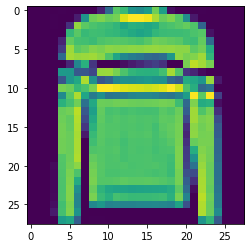

In [33]:
plt.imshow(x_train[5])

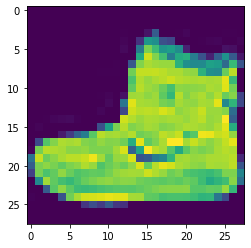

In [34]:
plt.imshow(x_train[0])

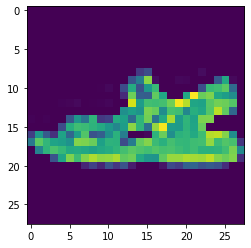

In [35]:
plt.imshow(x_train[1111])

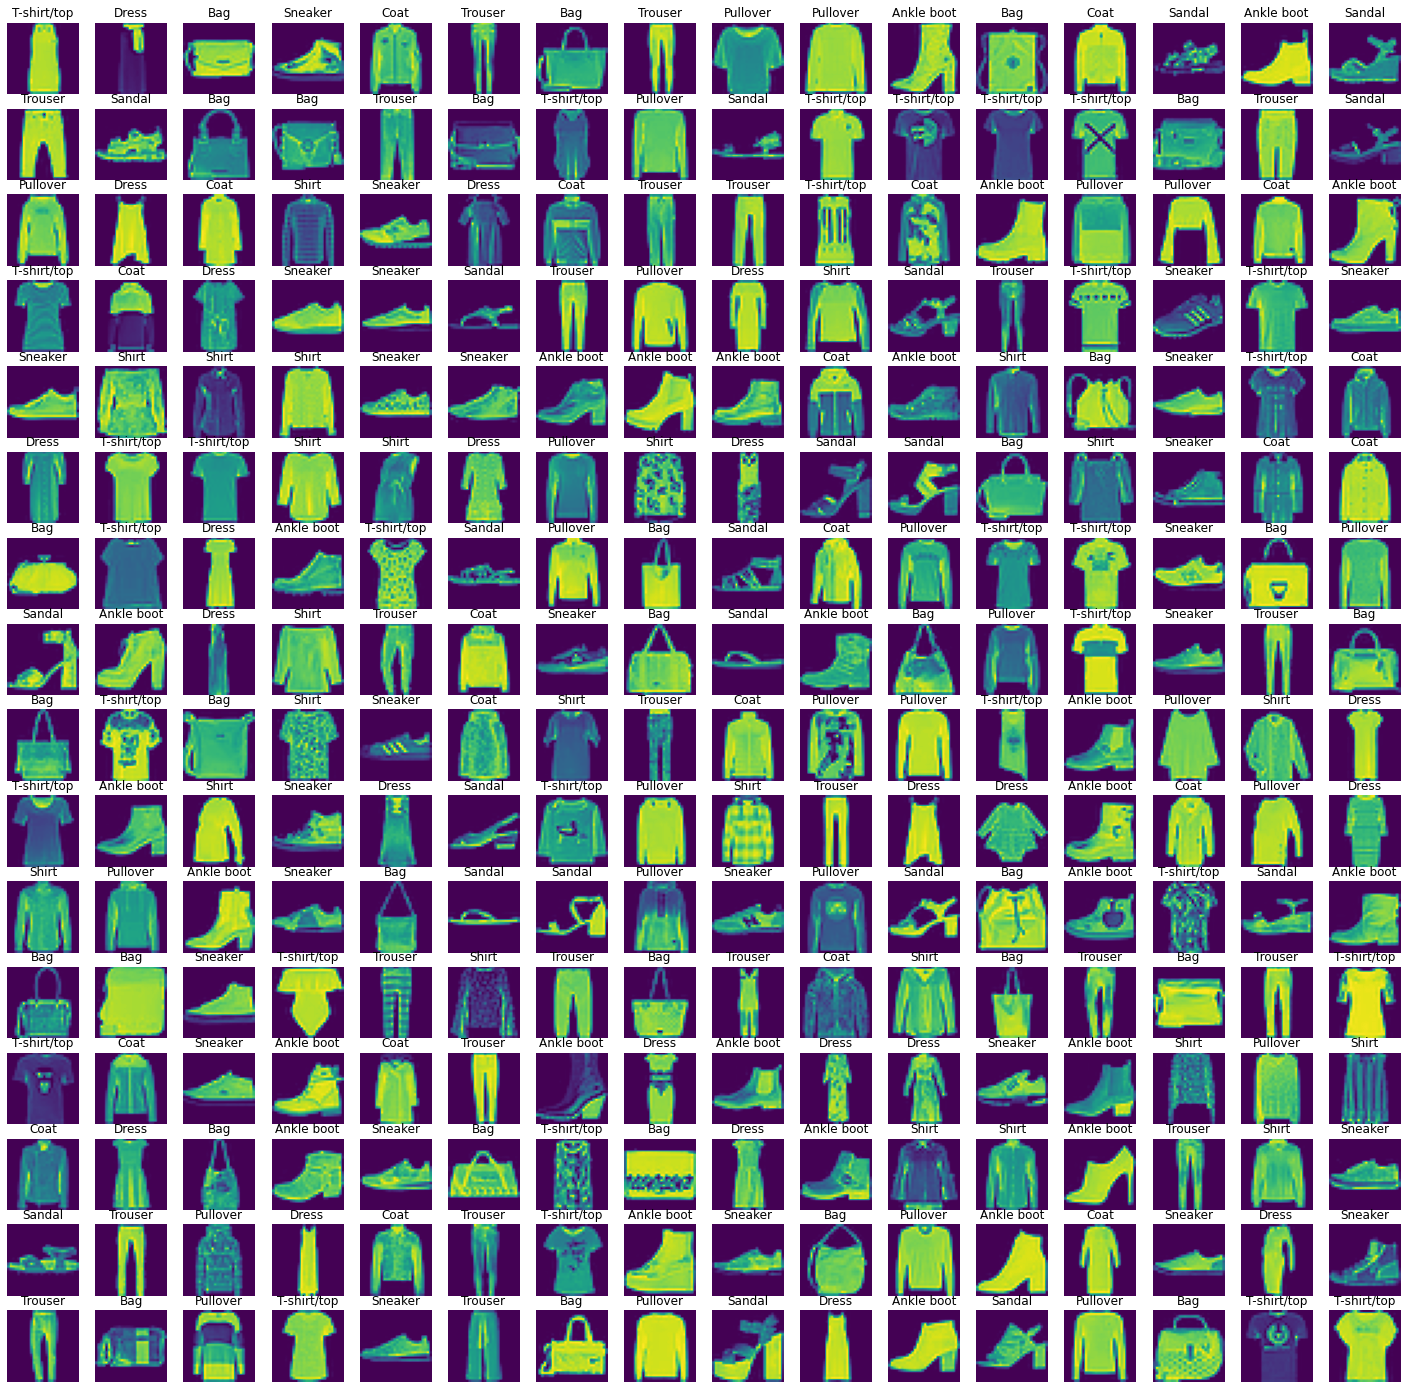

In [36]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

int(np.random.randint(low=0, high=60000, size=1))
x_train[int(np.random.randint(low=0, high=60000, size=1))]

plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=60000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])  

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [37]:
x_train[5].min()

0

In [38]:
x_train[5].max()

255

In [39]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [40]:
x_train[5].min()

0.0

In [41]:
x_train[5].max()

1.0

**Reshape the X into 4 dimension**

In [42]:
x_train = x_train.reshape(x_train.shape[0],28, 28,1) 
x_test  = x_test.reshape(x_test.shape[0], 28, 28,1)

In [43]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [44]:
from tensorflow.keras.utils import to_categorical

In [45]:
y_train = to_categorical(y_train, 10) 
y_test  = to_categorical(y_test, 10)
y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [47]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2) ))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 64)        16192     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [49]:
model.fit(x_train,y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 114s 60ms/step - loss: 0.3883 - accuracy: 0.8615 - val_loss: 0.3655 - val_accuracy: 0.8643
Epoch 2/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2489 - accuracy: 0.9075 - val_loss: 0.2544 - val_accuracy: 0.9101
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1986 - accuracy: 0.9262 - val_loss: 0.2316 - val_accuracy: 0.9187
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.1604 - accuracy: 0.9405 - val_loss: 0.2207 - val_accuracy: 0.9225
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1312 - accuracy: 0.9506 - val_loss: 0.2344 - val_accuracy: 0.9222
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1054 - accuracy: 0.9603 - val_loss: 0.2452 - val_accuracy: 0.9225
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0863 - accuracy: 0.9670 - val_loss: 0.2450

**Plot values of metrics you used in your model.**

In [50]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.388284,0.861550,0.365548,0.8643
1,0.248876,0.907467,0.254408,0.9101
2,0.198580,0.926183,0.231647,0.9187
3,0.160449,0.940517,0.220739,0.9225
4,0.131226,0.950583,0.234437,0.9222


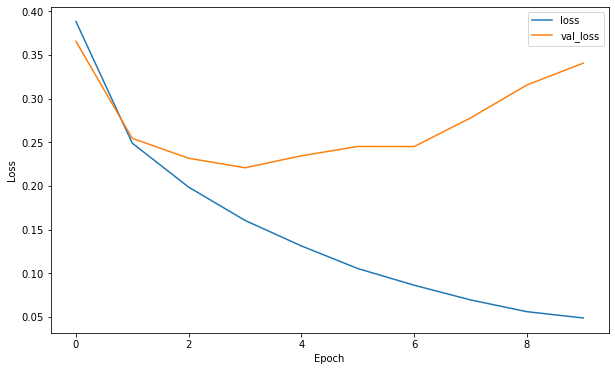

In [51]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

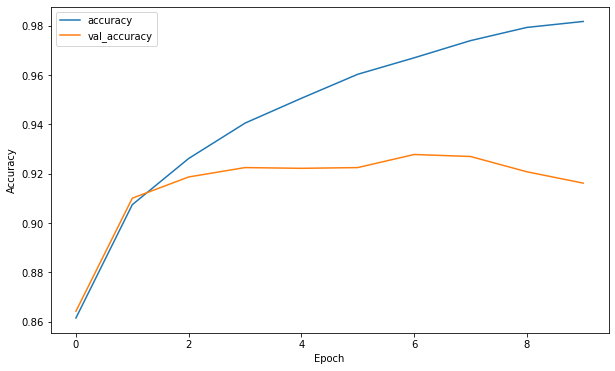

In [52]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [73]:
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0225 - accuracy: 0.9916 - val_loss: 0.5349 - val_accuracy: 0.9229
Epoch 2/50
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.5170 - val_accuracy: 0.9232
Epoch 3/50
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0228 - accuracy: 0.9921 - val_loss: 0.5474 - val_accuracy: 0.9208
Epoch 4/50
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.5603 - val_accuracy: 0.9178
Epoch 5/50
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.5696 - val_accuracy: 0.9195
Epoch 6/50
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.5962 - val_accuracy: 0.9190
Epoch 7/50
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0

**Plot values of metrics you used in your model.**

In [74]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.022496,0.991567,0.534920,0.9229
1,0.023149,0.992483,0.517024,0.9232
2,0.022773,0.992100,0.547412,0.9208
3,0.018481,0.993633,0.560350,0.9178
4,0.018508,0.993567,0.569612,0.9195


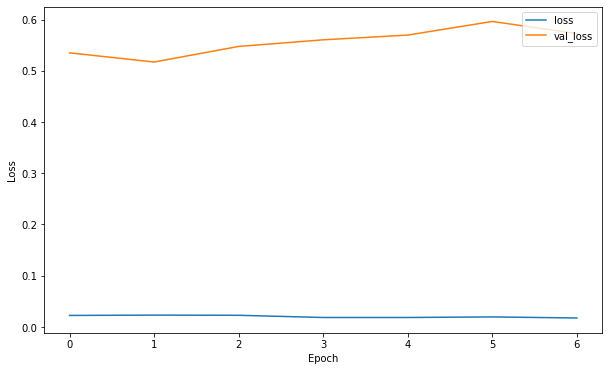

In [75]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

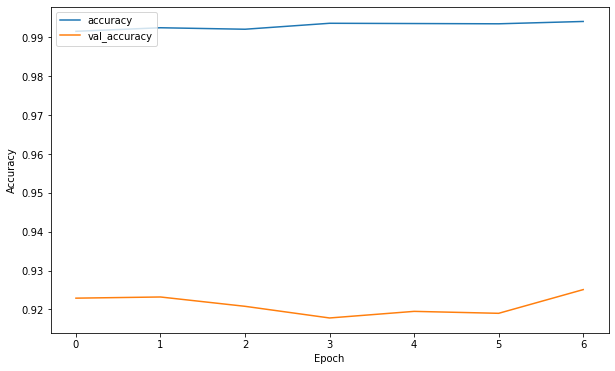

In [76]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [77]:
print(model.evaluate(x_test, y_test, verbose=1))

313/313 [==============================] - 4s 12ms/step - loss: 0.5726 - accuracy: 0.9251
[0.5725823640823364, 0.9251000285148621]


In [102]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [103]:
preds = model.predict(x_test)

In [106]:
predictions = np.argmax(y_test, axis=1)

In [108]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [109]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

Confusion Matrix
[[894   0  13  11   4   2  67   0   9   0]
 [  1 985   1   6   3   0   2   0   2   0]
 [ 17   2 871   5  53   0  50   0   2   0]
 [ 12   5  12 900  41   0  27   0   3   0]
 [  1   0  32  14 907   0  45   0   1   0]
 [  0   0   0   0   0 990   0   6   0   4]
 [103   0  35  17  66   0 769   0  10   0]
 [  0   0   0   0   0  12   0 979   0   9]
 [  3   2   1   3   2   2   0   2 985   0]
 [  0   0   0   0   0   5   0  24   0 971]]


In [110]:
print(classification_report(Y_pred, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1031
           1       0.98      0.99      0.99       994
           2       0.87      0.90      0.89       965
           3       0.90      0.94      0.92       956
           4       0.91      0.84      0.87      1076
           5       0.99      0.98      0.98      1011
           6       0.77      0.80      0.78       960
           7       0.98      0.97      0.97      1011
           8       0.98      0.97      0.98      1012
           9       0.97      0.99      0.98       984

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.93     10000



# Prediction

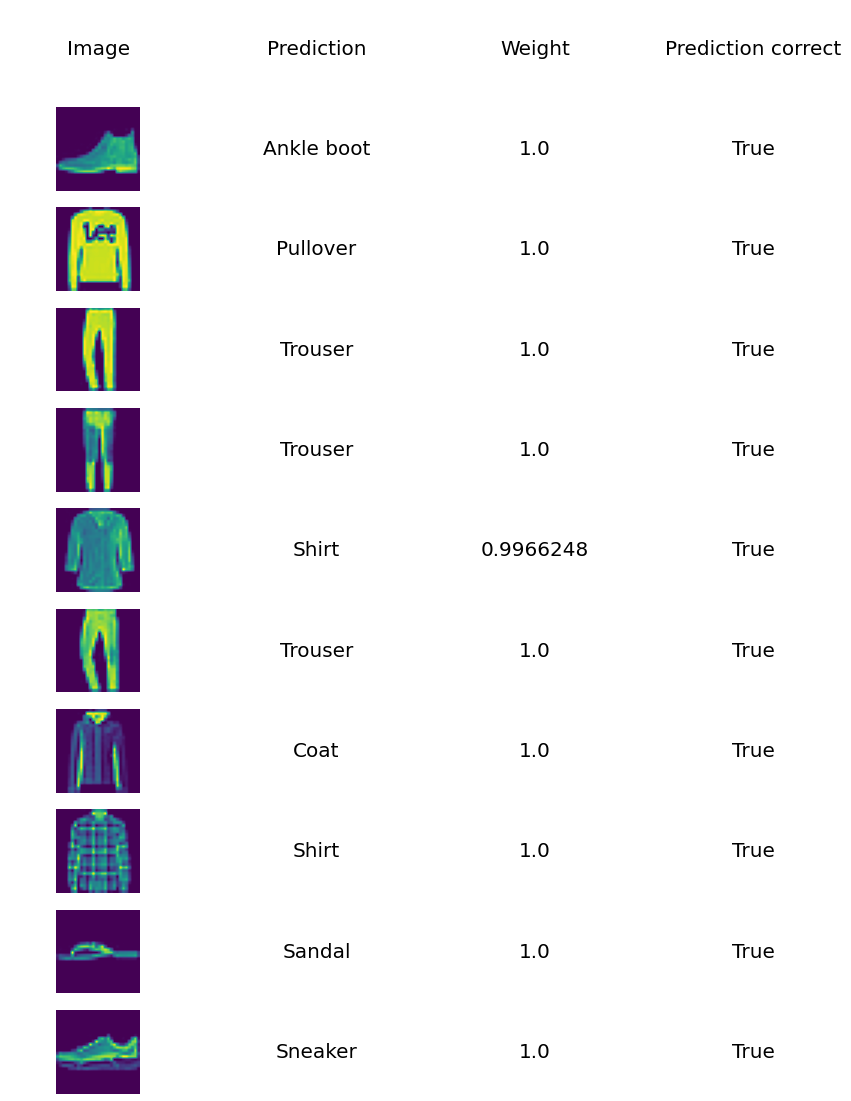

In [111]:
predictions = model.predict(x_test)

text_size = 20

plt.figure(figsize=(15,20))
plt.subplot(11, 4, 1)
plt.axis('off')
plt.text(0.5, 0.5, "Image", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 2)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 3)
plt.axis('off')
plt.text(0.5, 0.5, "Weight", size=text_size, ha='center', va='center')

plt.subplot(11, 4, 4)
plt.axis('off')
plt.text(0.5, 0.5, "Prediction correct", size=text_size, ha='center', va='center')

for i in range(10):
    predicted = predictions[i].argmax()
    actual = y_test[i].argmax()
    
    plt.subplot(11, 4, i*4 + 5)
    plt.axis('off')
    plt.imshow(x_test[i], cmap=None)
    
    plt.subplot(11, 4, i*4 + 6)
    plt.axis('off')
    plt.text(0.5, 0.5, classes[predicted], size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 7)
    plt.axis('off')
    plt.text(0.5, 0.5, str(predictions[i][predicted]), size=text_size, ha='center', va='center')
    
    plt.subplot(11, 4, i*4 + 8)
    plt.axis('off')
    plt.text(0.5, 0.5, str(actual == predicted), size=text_size, ha='center', va='center')
# show the figure
plt.show()

In [130]:
my_image = x_test[10]

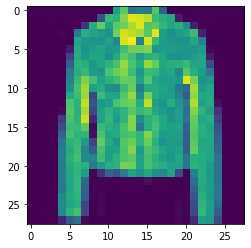

In [131]:
plt.imshow(my_image);

In [132]:
image_prediction=model.predict(my_image.reshape(1,28,28,1))

In [133]:
np.argmax(image_prediction, axis=1)

array([4], dtype=int64)

In [134]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'Coat'

# End of Assignment

In [135]:
model.save("image_classification.h5")